In [213]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


In [214]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [215]:
(df['Taxable.Income']<=30000).value_counts()

False    476
True     124
Name: Taxable.Income, dtype: int64

In [216]:
le=LabelEncoder()
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Undergrad"].unique()

array([0, 1])

In [217]:
le=LabelEncoder()
df["Urban"]=le.fit_transform(df["Urban"])
df["Urban"].unique()

array([1, 0])

In [218]:
le=LabelEncoder()
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])
df["Marital.Status"].unique()

array([2, 0, 1])

In [219]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [220]:
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array=df.values
X=array[:,[0,1,3,4,5]]
Y=array[:,2]
num_trees=200
kfold=KFold(n_splits=3,random_state=3,shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees,max_depth=3,min_samples_leaf=3,max_features='sqrt')
results=cross_val_score(model,X,Y,cv=kfold)
print(results)

[0. 0. 0.]


In [221]:
X,Y

(array([[     0,      2,  50047,     10,      1],
        [     1,      0, 134075,     18,      1],
        [     0,      1, 160205,     30,      1],
        ...,
        [     0,      0, 154058,      0,      1],
        [     1,      1, 180083,     17,      0],
        [     0,      0, 158137,     16,      0]]),
 array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
        98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
        97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
        87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
        10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
        81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
        81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
        51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
        41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
        35610, 66564, 87348, 69098, 28449, 392

In [222]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=25,n_jobs=-1)
params={
    'max_depth':[2,3,5,'None'],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,250]
}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=2,n_jobs=-1,verbose=2,scoring="accuracy")
grid_search.fit(X,Y)


Fitting 2 folds for each of 48 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=2)

In [223]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 50}
0.0


In [224]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=25)

In [225]:
model.fit(X,Y)
model.feature_importances_

array([0.08163809, 0.14207253, 0.43402611, 0.27421814, 0.06804514])

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [227]:
kfold=KFold(n_splits=3,random_state=3,shuffle=True)
model=AdaBoostClassifier(n_estimators=3,random_state=3)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())


0.0


In [228]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [229]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
kfold=KFold(n_splits=3,random_state=3,shuffle=True)
estimators=[]
model1=LogisticRegression(max_iter=20)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('decision_tree',model2))
model3=SVC()
estimators.append(('svm',model3))


In [230]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results_voting = cross_val_score(ensemble, X, Y, cv=kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [231]:
results_voting

array([0., 0., 0.])

In [232]:
results_voting.mean()

0.0

In [233]:
print(results_stacking)
results_stacking.mean()


[0.78333333 0.73333333 0.86666667 0.91666667 0.75       0.76666667
 0.83333333 0.66666667 0.83333333 0.78333333]


0.7933333333333332

In [234]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [235]:
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [236]:
import seaborn as sns


<ipython-input-237-03d8360cc6bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})


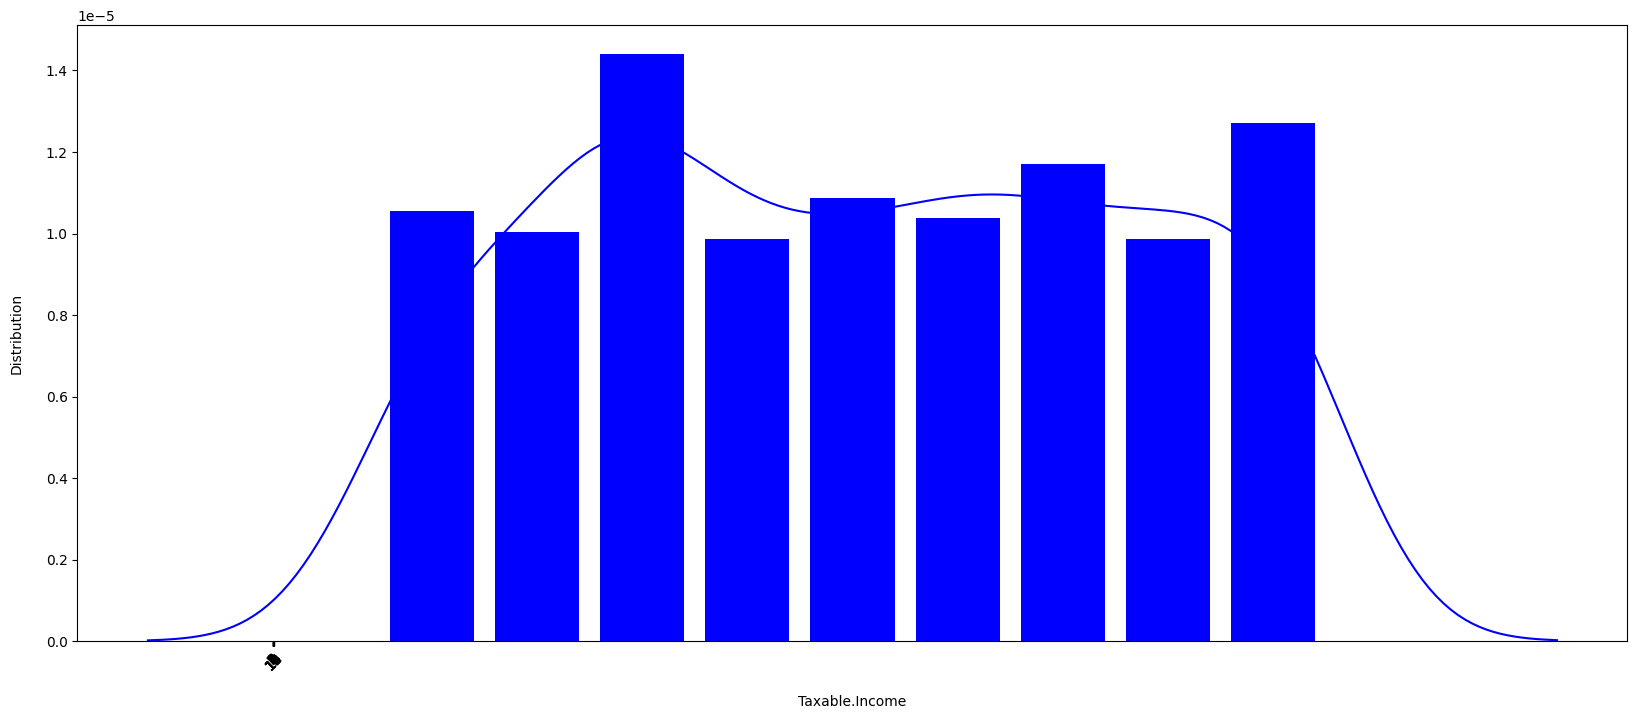

In [237]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")